In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API")
project = rf.workspace("qisthina").project("cat-breeds-cbvra")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cat-Breeds-1 in yolov11:: 100%|██████████| 12904/12904 [00:01<00:00, 7841.97it/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 14.6 MB/s eta 0:00:00a 0:00:01


In [3]:
!yolo task=detect mode=train data=/kaggle/input/cat-yaml/data.yaml model=yolov8n.pt epochs=50 batch=16 imgsz=640 lr0=0.001 optimizer=SGD \
workers=8 augment=True patience=10 device=0

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 80.7MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cat-yaml/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True,

In [4]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/input/cat-yaml/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/Cat-Breeds-1/valid/labels.cache... 386 images, 0 b
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        386        387      0.869      0.882      0.938      0.829
            Abyssinian         26         26      0.877      0.885      0.956      0.861
                Bengal         27         27      0.766      0.728      0.842      0.776
                Birman         34         34      0.841      0.932       0.94      0.821
                Bombay         29         29      0.925      0.847       0.93      0.779
     British Shorthair         34         34      0.919      0.997      0.982      0.821
          Egyptian_Mau         27         27      0.806      0.815      0.925      0.801
                Havana         28         28      0.714   

In [5]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/working/Cat-Breeds-1/test/images

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs

image 1/258 /kaggle/working/Cat-Breeds-1/test/images/Havana_117_jpg.rf.854cf8e20b68cf2b81e8b2bec4f9e20c.jpg: 640x640 1 Havana, 9.4ms
image 2/258 /kaggle/working/Cat-Breeds-1/test/images/Havana_128_jpg.rf.58768b3c30416b103507006fcfe10182.jpg: 640x640 1 Havana, 7.5ms
image 3/258 /kaggle/working/Cat-Breeds-1/test/images/Havana_129_jpg.rf.5d07ac40c60e468666bfde7199eb0ce4.jpg: 640x640 1 Bombay, 7.4ms
image 4/258 /kaggle/working/Cat-Breeds-1/test/images/Havana_161_jpg.rf.4c3e2231a9cd14c17ea454bffdf238c8.jpg: 640x640 1 Havana, 7.4ms
image 5/258 /kaggle/working/Cat-Breeds-1/test/images/Havana_173_jpg.rf.bd8a6cc0506ef6f11953b95ac0eee880.jpg: 640x640 1 Havana, 7.6ms
image 6/258 /kaggle/working/Cat-Breeds-1/test/images/Havana_182_jpg.rf.ff280257ba9c27a3cdd187784944daa9.jpg: 640x640 1 Havana, 7.3ms
image 7/258 /kaggle/working/Cat-Breeds-1/tes

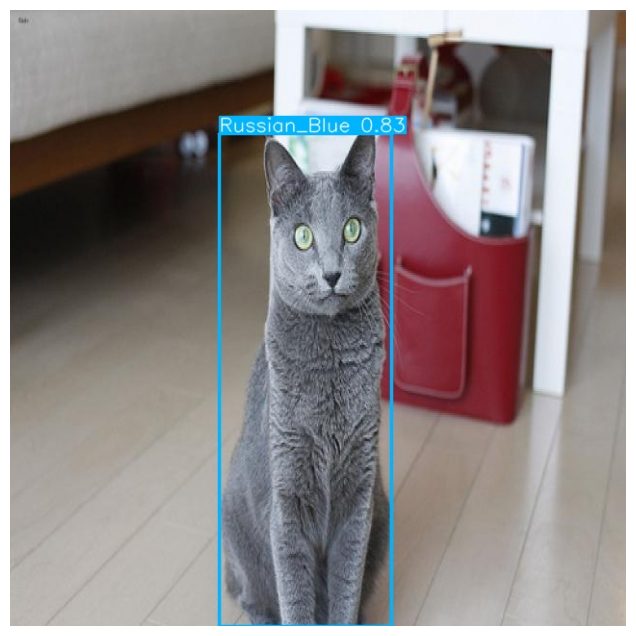

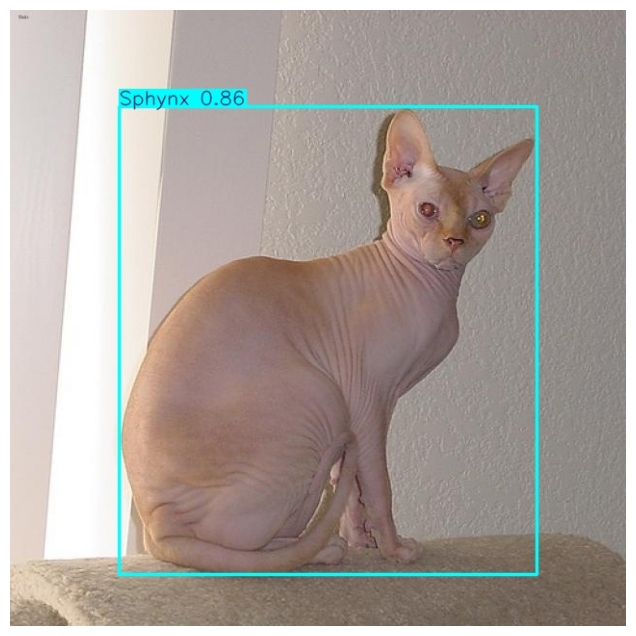

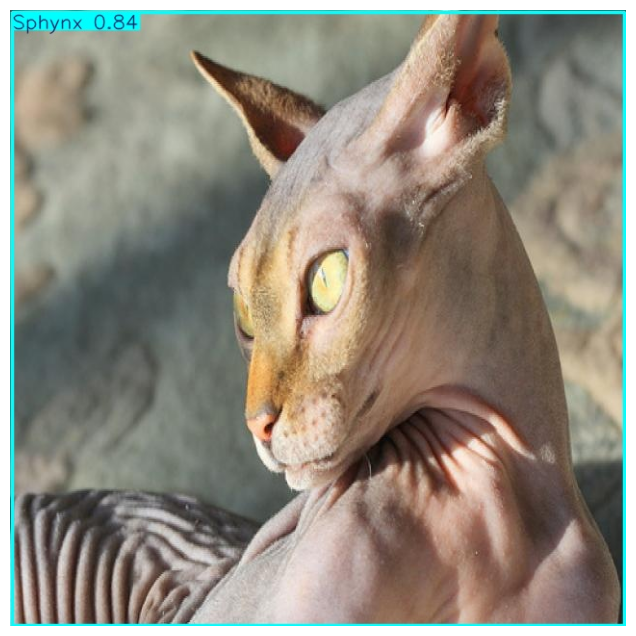

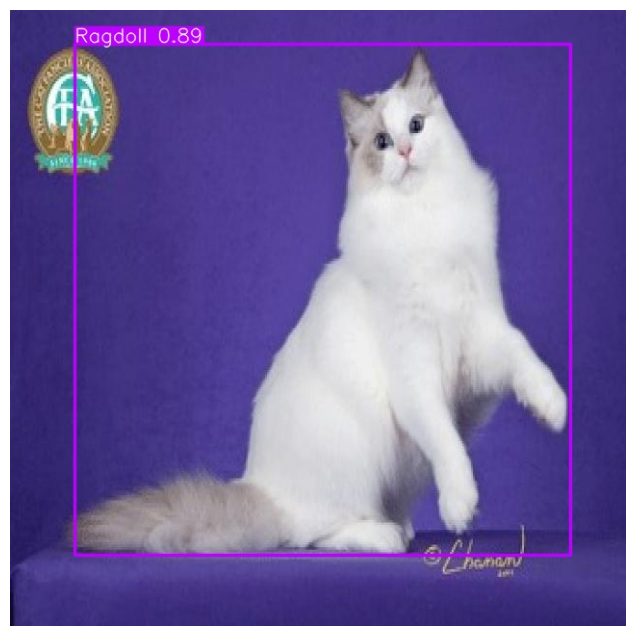

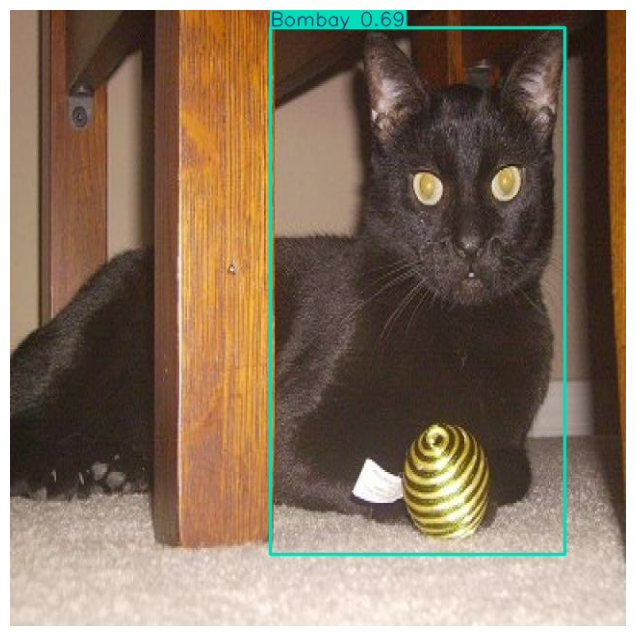

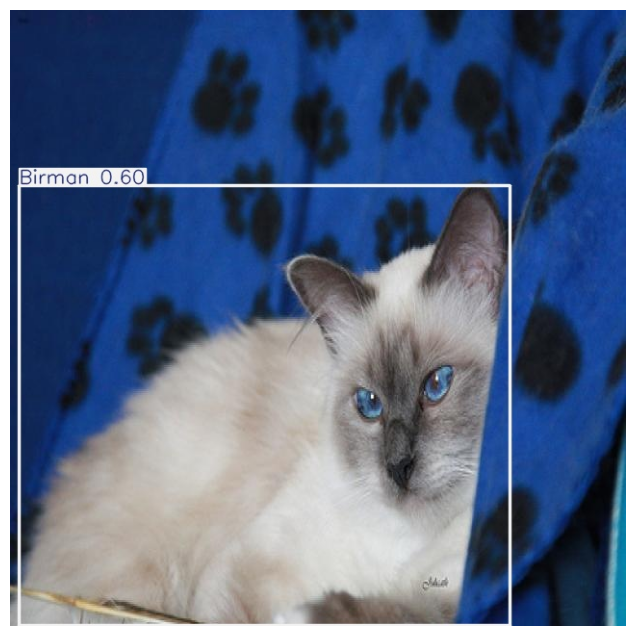

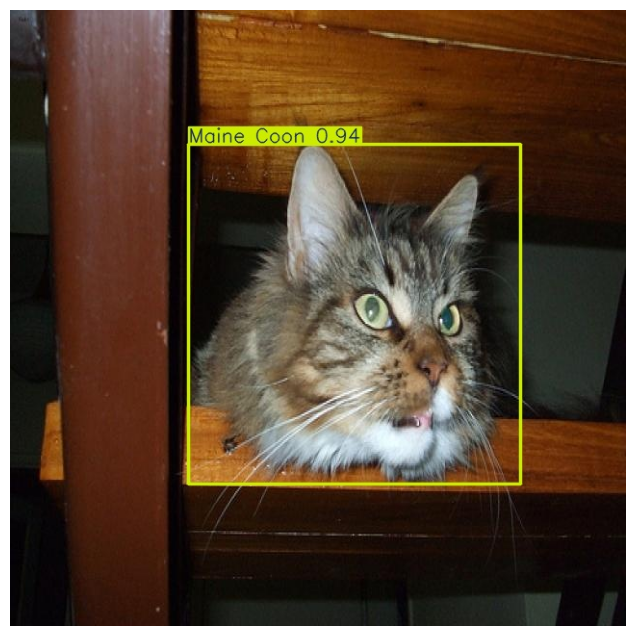

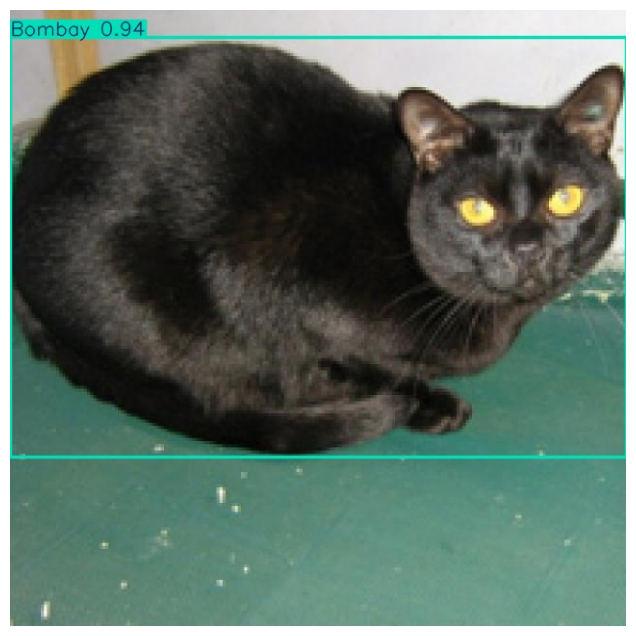

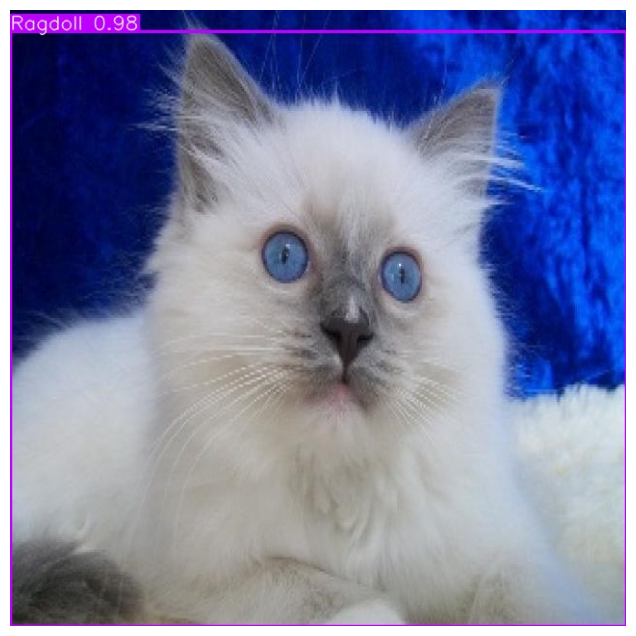

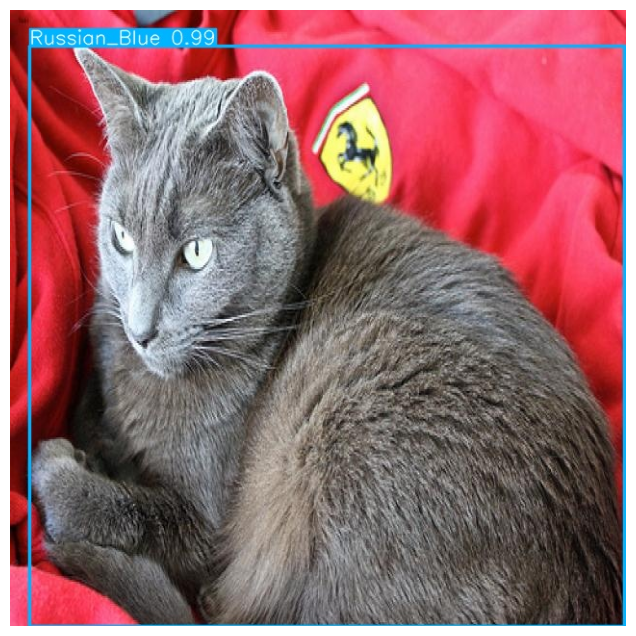

In [6]:
import cv2
import matplotlib.pyplot as plt
import glob

# Load predicted images
predicted_images = glob.glob('runs/detect/predict/*.jpg')

# Plot first 5 images
for img_path in predicted_images[:10]:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 45.3 MB/s eta 0:00:0000:0100:01


In [8]:
!yt-dlp -f best -o "input_video.mp4" --download-sections "*0-00:10:00" https://www.youtube.com/watch?v=paWE-GvDO1c

         To let yt-dlp download and merge the best available formats, simply do not pass any format selection.
         If you know what you are doing and want only the best pre-merged format, use "-f b" instead to suppress this warning
[youtube] Extracting URL: https://www.youtube.com/watch?v=paWE-GvDO1c
[youtube] paWE-GvDO1c: Downloading webpage
[youtube] paWE-GvDO1c: Downloading ios player API JSON
[youtube] paWE-GvDO1c: Downloading mweb player API JSON
[youtube] paWE-GvDO1c: Downloading player 62ccfae7
[youtube] paWE-GvDO1c: Downloading m3u8 information
[info] paWE-GvDO1c: Downloading 1 format(s): 18
[info] paWE-GvDO1c: Downloading 1 time ranges: 0.0-600.0
[download] Destination: input_video.mp4
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'https://rr2---sn-qxo7rn7r.googlevideo.com/videoplayback?expire=1733416330&ei=KoFRZ8yjObea2_gPhdnAoAc&ip=34.41.161.81&id=o-AMrEXZA8I8eZi0N9q451o6-GU_CbIZ4ewEgoFs9gRrGU&itag=18&source=youtube&requiressl=yes&xpc=EgVo2aDSNQ%3D%3D&met=1733394730%2C&mh=5s&

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=input_video.mp4 conf=0.5